In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline  



from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv('train.csv')  #Visualizations on trian data

[Text(0, 0, 'Pinot Noir'),
 Text(0, 0, 'Chardonnay'),
 Text(0, 0, 'Cabernet Sauvignon'),
 Text(0, 0, 'Red Blend'),
 Text(0, 0, 'Bordeaux-style Red Blend'),
 Text(0, 0, 'Riesling'),
 Text(0, 0, 'Sauvignon Blanc'),
 Text(0, 0, 'Syrah'),
 Text(0, 0, 'Rosé'),
 Text(0, 0, 'Merlot'),
 Text(0, 0, 'Nebbiolo'),
 Text(0, 0, 'Zinfandel'),
 Text(0, 0, 'Sangiovese'),
 Text(0, 0, 'Malbec'),
 Text(0, 0, 'Portuguese Red'),
 Text(0, 0, 'White Blend'),
 Text(0, 0, 'Sparkling Blend'),
 Text(0, 0, 'Tempranillo'),
 Text(0, 0, 'Rhône-style Red Blend'),
 Text(0, 0, 'Pinot Gris'),
 Text(0, 0, 'Champagne Blend'),
 Text(0, 0, 'Cabernet Franc'),
 Text(0, 0, 'Grüner Veltliner')]

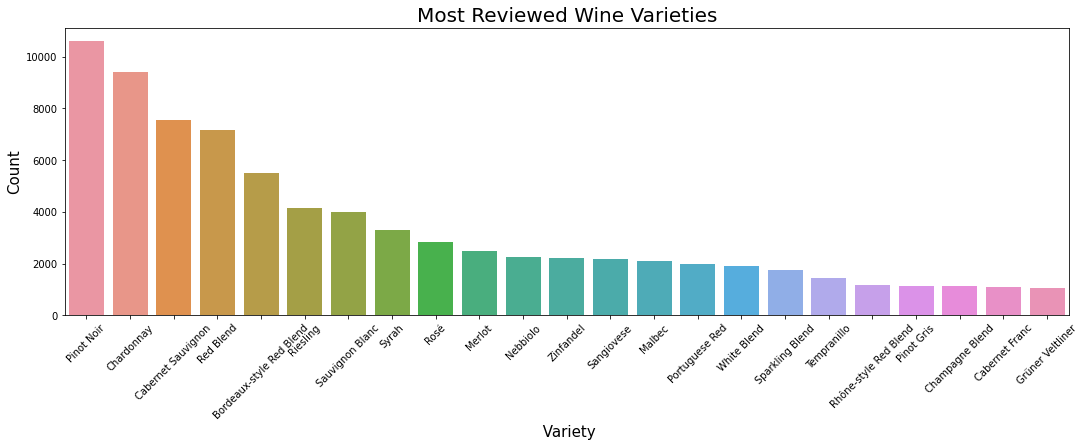

In [3]:
#  Visualization

plt.figure(figsize=(18,18))
plt.subplot(3,1,1)

variety = df.groupby('variety').filter(lambda x: len(x) > 1000)
varieties = variety['variety'].value_counts().index.tolist()

g = sns.countplot(x=variety['variety'], order=varieties)
g.set_title("Most Reviewed Wine Varieties", fontsize=20)
g.set_xlabel(" Variety", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=45)


# Insight 1: 
### 'Pinot Noir' is most popular variety across most countries

Text(0.5, 1.0, 'Most popular Variety by Country')

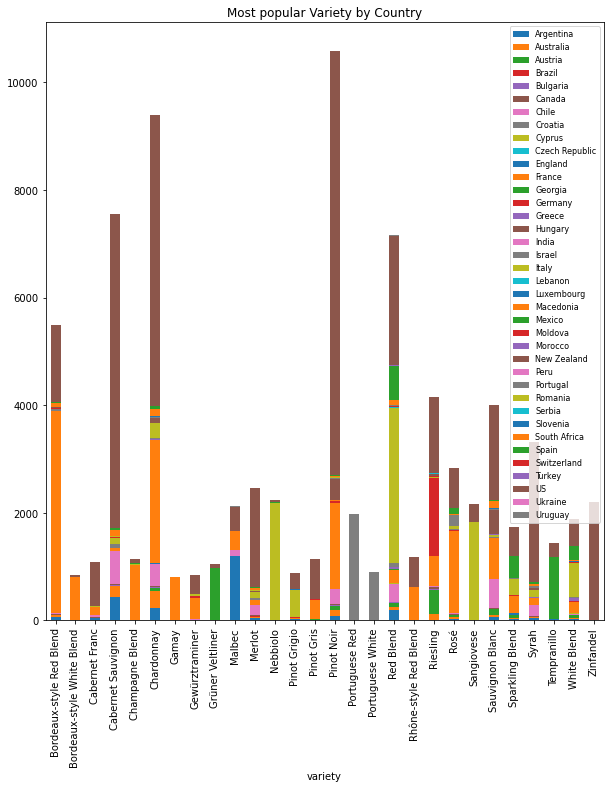

In [4]:


# Most popular Variety across Countries

test5 = pd.crosstab(index=df['variety'],columns=df['country'])

plot = test5.plot(figsize=(10,11),kind='bar', stacked=True)

plot.legend(loc='upper right', fontsize=8)

plot.set_title('Most popular Variety by Country')

# Insight 2:
### Wines originated from France were most expensive.
###          U.S, Spain and Romania sells the least expensive varities of wine 

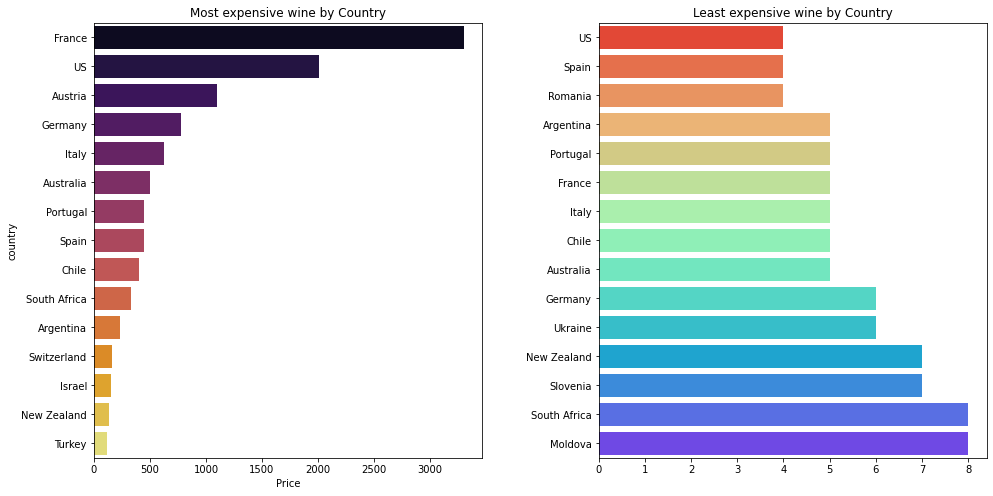

In [5]:

# Most expensive & least expensive wines by country (Less than $5)

fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = df.groupby(['country'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'inferno',ax=ax1)
ax1.set_title('Most expensive wine by Country')
ax1.set_xlabel('Price')
cnt = df.groupby(['country'])['price'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette = 'rainbow_r',ax=ax2)
ax2.set_title('Least expensive wine by Country')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3);

# Insight 3: 
### Top 5 wine producing countries with highest review ratings are:
####           1.England
####          2.Austria
####             3.Canada
####             4.India
####             5.Italy

###        Least Rated wine producing countries are : Peru, Ukraine,Brazil

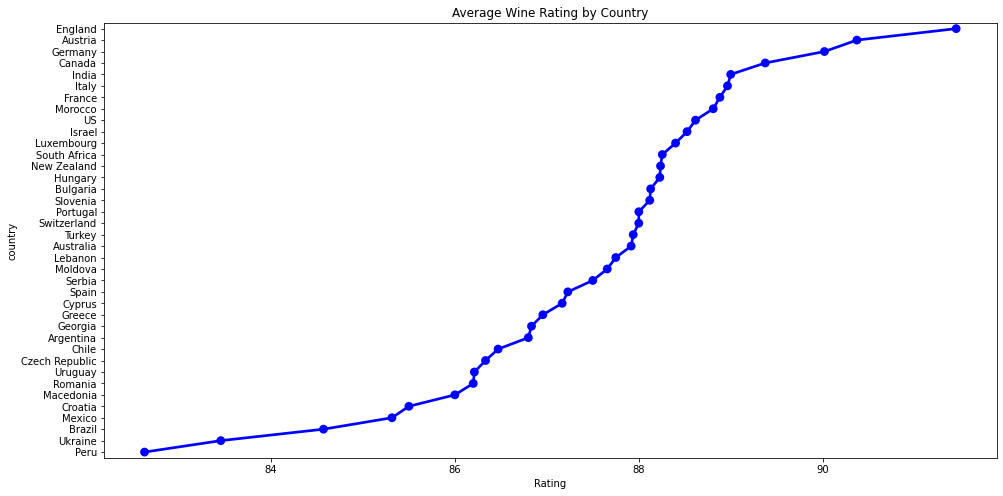

In [6]:
# Average Wine Rating by Country
cnt = df.groupby(['country',]).mean()['points'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(16,8))
sns.pointplot(x = cnt['points'] ,y = cnt.index ,color='b',orient='h')
plt.title('Average Wine Rating by Country')
plt.xlabel('Rating');



# Insight 4:
### Most Rated Wines are in the price range of < $500
### Most of the ratings are in the range of 85.0-92.5

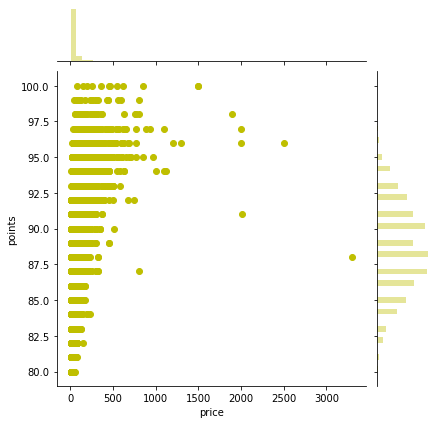

In [7]:


# Wine Price v/s Review Points Graph 
sns.jointplot( x = df['price'],y = df['points'],color='y');

# Insight 5: 
### Most Expensive Wine is prepared at the 'Clos du Mesnil Brut Blanc de Blanc' Vineyard(Designation)
### Also, 'Barca - Velha' and 'Cristal Vintage Brut' was marginally rated higher than others

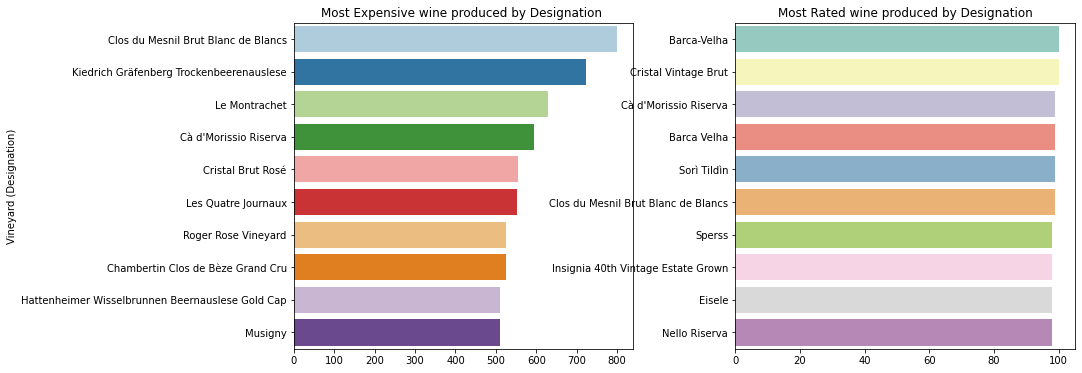

In [8]:


# Most Expensive and Most Rated wine produced by Designation
cnt = df.groupby(['designation'])['price'].mean().to_frame().sort_values(by='price',ascending=False)[:10]
f,ax = plt.subplots(1,2,figsize= (14,6))
ax1,ax2 = ax.flatten()
sns.barplot(cnt['price'], y = cnt.index, palette = 'Paired', ax = ax1)
ax1.set_xlabel('')
ax1.set_ylabel('Vineyard (Designation)')
ax1.set_title('Most Expensive wine produced by Designation ')

cnt = df.groupby(['designation'])['points'].mean().to_frame().sort_values(by = 'points', ascending = False)[:10]
sns.barplot(cnt['points'], y = cnt.index, palette = 'Set3', ax = ax2)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('Most Rated wine produced by Designation')
plt.subplots_adjust(wspace=0.3)

## Insight 6: 
### More than half of the reviews have been recorded by User '@vossroger' and mostly for wines  originating from France


Text(0.5, 1.0, ' Most Reviews by User')

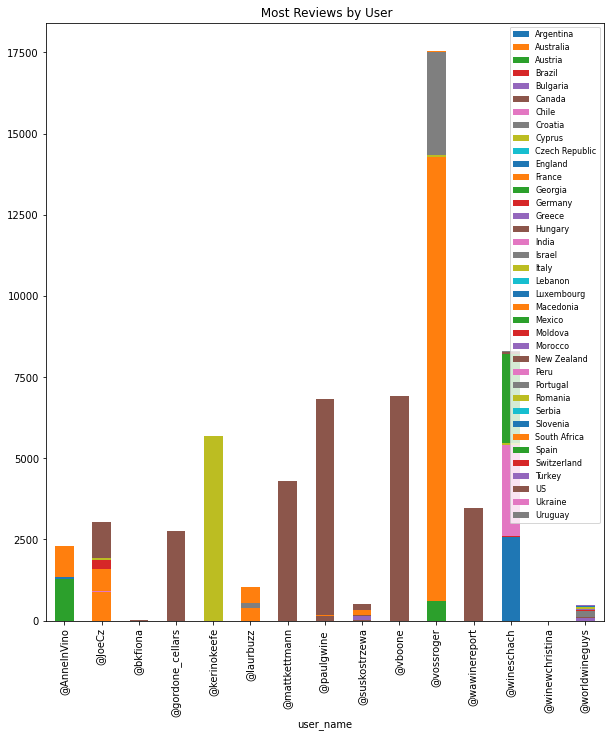

In [9]:

# Most Reviews by User 

muser_name = pd.crosstab(index=df['user_name'],columns=df['country'])

plot = muser_name.plot(figsize=(10,11),kind='bar', stacked=True)

plot.legend(loc='upper right', fontsize=8)

plot.set_title(' Most Reviews by User')

------------------------------------------------------------------------------